In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries
!pip install cdflib -t /home/aistudio/external-libraries

In [1]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

In [2]:
!tar -xf ./data/data223444/Poses_D3_Positions_S1.tgz -C ./data/data223444/
!tar -xf ./data/data223444/Poses_D3_Positions_S11.tgz -C ./data/data223444/
!tar -xf ./data/data223444/Poses_D3_Positions_S5.tgz -C ./data/data223444/
!tar -xf ./data/data223444/Poses_D3_Positions_S6.tgz -C ./data/data223444/
!tar -xf ./data/data223444/Poses_D3_Positions_S7.tgz -C ./data/data223444/
!tar -xf ./data/data223444/Poses_D3_Positions_S8.tgz -C ./data/data223444/
!tar -xf ./data/data223444/Poses_D3_Positions_S9.tgz -C ./data/data223444/

1621 96


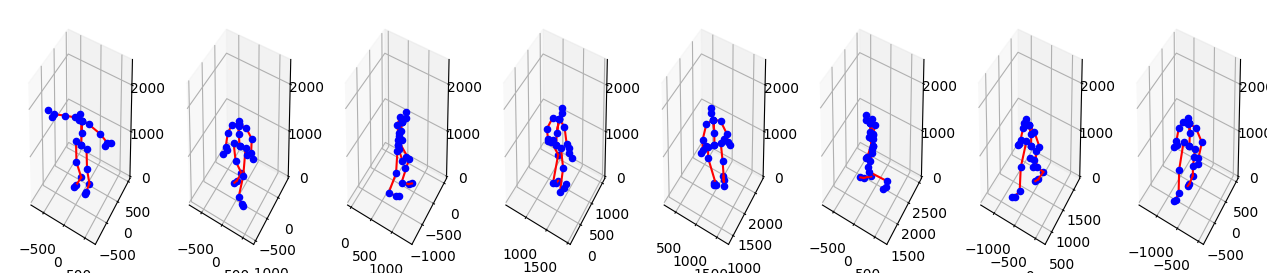

0: 1539 1621 1621


In [3]:
import cdflib
import numpy as np
import matplotlib.pyplot as plt  
from mpl_toolkits import mplot3d 

### 分析人体各个关节的长度
def Len(x, y):
    return pow(pow(x[0]-y[0],2)+pow(x[1]-y[1],2)+pow(x[2]-y[2],2),0.5)

# Creating figures for the plot  
### 根据去重复点更新显示
# fig = plt.figure(figsize = (10, 7))  
def Plot3D(pose_3d_pro, ax):
    # ax = plt.axes(projection ="3d")  
    a = 0
    b = 1
    c = 2
    # Creating a plot using the random datasets  
    ax.plot([pose_3d_pro[0][a], pose_3d_pro[1][a]], [pose_3d_pro[0][b], pose_3d_pro[1][b]], [pose_3d_pro[0][c], pose_3d_pro[1][c]], color = "r")
    ax.plot([pose_3d_pro[0][a], pose_3d_pro[6][a]], [pose_3d_pro[0][b], pose_3d_pro[6][b]], [pose_3d_pro[0][c], pose_3d_pro[6][c]], color = "r")
    ax.plot([pose_3d_pro[0][a], pose_3d_pro[11][a]], [pose_3d_pro[0][b], pose_3d_pro[11][b]], [pose_3d_pro[0][c], pose_3d_pro[11][c]], color = "r")

    ax.plot([pose_3d_pro[12][a], pose_3d_pro[16][a]], [pose_3d_pro[12][b], pose_3d_pro[16][b]], [pose_3d_pro[12][c], pose_3d_pro[16][c]], color = "r")
    ax.plot([pose_3d_pro[12][a], pose_3d_pro[22][a]], [pose_3d_pro[12][b], pose_3d_pro[22][b]], [pose_3d_pro[12][c], pose_3d_pro[22][c]], color = "r")

    for i in range(28):
        ax.scatter3D(pose_3d_pro[i][a],pose_3d_pro[i][b],pose_3d_pro[i][c], color = "b") 
        if i >=2 and i <= 5:
            ax.plot([pose_3d_pro[i-1][a], pose_3d_pro[i][a]], [pose_3d_pro[i-1][b], pose_3d_pro[i][b]], [pose_3d_pro[i-1][c], pose_3d_pro[i][c]], color = "r") 
            # print(',',Len(pose_3d_pro[i-1], pose_3d_pro[i]))
        elif i >= 7 and i <= 10:
            ax.plot([pose_3d_pro[i-1][a], pose_3d_pro[i][a]], [pose_3d_pro[i-1][b], pose_3d_pro[i][b]], [pose_3d_pro[i-1][c], pose_3d_pro[i][c]], color = "r") 
            # print(',',Len(pose_3d_pro[i-1], pose_3d_pro[i]))
        elif i >= 12 and i <= 15:
            ax.plot([pose_3d_pro[i-1][a], pose_3d_pro[i][a]], [pose_3d_pro[i-1][b], pose_3d_pro[i][b]], [pose_3d_pro[i-1][c], pose_3d_pro[i][c]], color = "r") 
            # print(',',Len(pose_3d_pro[i-1], pose_3d_pro[i]))
        elif i >= 17 and i <= 20:
            ax.plot([pose_3d_pro[i-1][a], pose_3d_pro[i][a]], [pose_3d_pro[i-1][b], pose_3d_pro[i][b]], [pose_3d_pro[i-1][c], pose_3d_pro[i][c]], color = "r")
            # print(',',Len(pose_3d_pro[i-1], pose_3d_pro[i]))
        elif i >= 23 and i <= 26:
            ax.plot([pose_3d_pro[i-1][a], pose_3d_pro[i][a]], [pose_3d_pro[i-1][b], pose_3d_pro[i][b]], [pose_3d_pro[i-1][c], pose_3d_pro[i][c]], color = "r") 
            # print(',',Len(pose_3d_pro[i-1], pose_3d_pro[i])) 

    RADIUS = 750  # space around the subject
    xroot, yroot, zroot = pose_3d_pro[0][0], pose_3d_pro[0][1], pose_3d_pro[0][2]
    ax.set_xlim3d([-RADIUS + xroot, RADIUS + xroot])
    ax.set_zlim3d([0, 2 * RADIUS + zroot])
    ax.set_ylim3d([-RADIUS + yroot, RADIUS + yroot])


file = './data/data223444/S11/MyPoseFeatures/D3_Positions/Walking.cdf'

cdf_file = cdflib.CDF(file)

poses_3d = cdf_file[0].squeeze()
print(len(poses_3d),len(poses_3d[0]))
pose_3d_pro1 = np.ones((len(poses_3d),28,3),dtype=float)

### 去除重复点
# 96->32*3, 32->28
for i in range(len(poses_3d)):
    cnt = 0
    for j in range(32):     
        # print(j, cnt)
        pose_3d_pro1[i,cnt,:] = poses_3d[i][j*3:j*3+3]
        if j==19 or j==22 or j==27 or j==30:
            j = j + 1
        else:
            cnt = cnt + 1
# print(pose_3d_pro1[0,:,:])

#设置画布大小像素点
# fig = plt.figure(figsize=(10,10),dpi=100)
fig = plt.figure(figsize=plt.figaspect(0.2))
for j in range(8):
    ax = fig.add_subplot(1, 8, j+1, projection='3d')
    Plot3D(pose_3d_pro1[j*50,:,:], ax)
plt.show()

interval1 = int(len(poses_3d)*0.95)
interval2 = int(len(poses_3d)*1.0)
# interval2 = int(len(poses_3d) - 600)
print('0:',interval1,interval2,len(poses_3d))

# train_pose = pose_3d_pro1[0:interval1,:,:]
val_pose = pose_3d_pro1[0:-1,:,:]
# test_pose = pose_3d_pro1[interval2:-1,:,:]

# train_pose_in = train_pose[0:2399,:,:]
# train_pose_out = train_pose[1:2400,:,:]

In [ ]:
### Read all files
import os
file = [""] * 14
index = ['S1','S5','S6','S7','S8','S9','S11']
for i in index:
    path = './data/data223444/'+i+'/MyPoseFeatures/D3_Positions/'
    for dirpath, dirnames, filenames in os.walk(path):
        # print(f'当前目录：{dirpath}')
        for filename in filenames:
            # if 'Sitting' in filename:
            #     if 'WalkingDog' in filename:
            #         continue
                print(path+filename)
                cdf_file = cdflib.CDF(path+filename)
                poses_3d = cdf_file[0].squeeze()
                print(len(poses_3d),len(poses_3d[0]))

                pose_3d_pro1 = np.ones((len(poses_3d),28,3),dtype=float)

                # 96->32*3, 32->28
                for i in range(len(poses_3d)):
                    cnt = 0
                    for j in range(32):     
                        # print(j, cnt)
                        pose_3d_pro1[i,cnt,:] = poses_3d[i][j*3:j*3+3]
                        if j==19 or j==22 or j==27 or j==30:
                            j = j + 1
                        else:
                            cnt = cnt + 1

                interval1 = int(len(poses_3d)*0.7)
                interval2 = int(len(poses_3d)*0.9)
                interval2 = int(len(poses_3d) - 600)
                print('0:',interval1,interval2,len(poses_3d))

                train_pose = pose_3d_pro1[0:interval1,:,:]
                val_pose = pose_3d_pro1[interval1:interval2,:,:]
                test_pose = pose_3d_pro1[interval2:-1,:,:]
                print("--------------------------------")

In [ ]:
### 分析人体各个关节的长度
a = pose_3d_pro1[0,:,:]

def Len(x, y):
    return pow(pow(x[0]-y[0],2)+pow(x[1]-y[1],2)+pow(x[2]-y[2],2),0.5)

for i in range(28):
    print('i = ',i,a[i])
    if a[i][0]==a[i-1][0]:
        print('j = ',i)

In [ ]:
import paddle
import paddle.nn.functional as F
import paddle.fluid as fluid
import numpy as np
from paddle.fluid.dygraph import Conv2D, Pool2D, Linear, Dropout, BatchNorm
import paddle.nn as nn
import paddle.optimizer as optim
import paddle.nn.functional as F

class simpy(fluid.dygraph.Layer):
    def __init__(self, num_classes=5):
        super(simpy, self).__init__()
        w_attr = paddle.ParamAttr(
            initializer=None)
        bias_attr = paddle.ParamAttr(
            initializer=paddle.nn.initializer.Constant(value=1.0))

        self.fc1 = nn.Linear(3, 32, weight_attr=w_attr)
        self.bn1 = paddle.nn.BatchNorm1D(32)
        self.lr1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(32, 64, weight_attr=w_attr)
        self.lr2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(64, 32, weight_attr=w_attr)
        self.lr3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(32, 3, weight_attr=w_attr)
        self.lr4 = nn.LeakyReLU()
    def forward(self, x):
        x = self.fc1(x)
        # x = self.bn1(x)
        x = self.lr1(x)
        x = self.fc2(x)
        x = self.lr2(x)
        x = self.fc3(x)
        x = self.lr3(x)
        x = self.fc4(x)
        x = self.lr4(x)
        return x

In [ ]:
### BaseLine S1 50 7.31 14.17
### 增加dropout
import paddle
import paddle.nn.functional as F
import paddle.fluid as fluid
import numpy as np
from paddle.fluid.dygraph import Conv2D, Pool2D, Linear, Dropout, BatchNorm
import paddle.nn as nn
import paddle.optimizer as optim
import paddle.nn.functional as F

class simpy(fluid.dygraph.Layer):
    def __init__(self, num_classes=5):
        super(simpy, self).__init__()
        w_attr = paddle.ParamAttr(
            initializer=None)
        bias_attr = paddle.ParamAttr(
            initializer=paddle.nn.initializer.Constant(value=1.0))
        weight_ih_attr = paddle.ParamAttr(
            initializer=paddle.nn.initializer.KaimingNormal())
        weight_hh_attr = paddle.ParamAttr(
            initializer=paddle.nn.initializer.Constant(value=0.5))

        n = 4
        self.fc1 = nn.Linear(3, 16*n, weight_attr=w_attr)
        self.lr1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(16*n, 32*n, weight_attr=w_attr)
        self.lr2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(32*n, 16*n, weight_attr=w_attr)
        self.lr3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(16*n, 3, weight_attr=w_attr)
        self.lr4 = nn.LeakyReLU()

        self.dp1 = nn.Dropout(p=0.1)
        self.dp2 = nn.Dropout(p=0.1)
        self.dp3 = nn.Dropout(p=0.2)

        self.conv1 = nn.Conv1D(28, 28, 3, weight_attr=w_attr,  stride=1, padding='SAME')
        self.lr0 = nn.LeakyReLU()

    def forward(self, x):

        x1 = self.fc1(x)
        x1 = self.lr1(x1)
        x1 = self.dp1(x1)
        x2 = self.fc2(x1)
        x2 = self.lr2(x2)
        x2 = self.dp2(x2)
        x3 = self.fc3(x2)
        x3 = self.lr3(x3)
        x4 = self.fc4(x3)
        x = self.lr4(x4)
        return x

y = paddle.to_tensor(list(train_pose[0,:,:].squeeze()))
net = simpy()
x = net(y)
print(x.shape)
params_info = paddle.summary(net, [(1, 28, 3)],
                            dtypes=['float32'])
print(params_info)

In [ ]:
### BaseLine v RNN S1 50 7.31 14.17
### 增加dropout
import paddle
import paddle.nn.functional as F
import paddle.fluid as fluid
import numpy as np
from paddle.fluid.dygraph import Conv2D, Pool2D, Linear, Dropout, BatchNorm
import paddle.nn as nn
import paddle.optimizer as optim
import paddle.nn.functional as F

class simpy1(fluid.dygraph.Layer):
    def __init__(self, num_classes=5):
        super(simpy1, self).__init__()
        w_attr = paddle.ParamAttr(
            initializer=None)
        bias_attr = paddle.ParamAttr(
            initializer=paddle.nn.initializer.Constant(value=1.0))
        weight_ih_attr = paddle.ParamAttr(
            initializer=paddle.nn.initializer.XavierNormal())
        weight_hh_attr = paddle.ParamAttr(
            initializer=paddle.nn.initializer.XavierNormal())

        self.fc1 = nn.Linear(3, 16, weight_attr=w_attr)
        self.bn1 = nn.BatchNorm1D(32*2)
        self.lr1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(32*2, 64*2, weight_attr=w_attr)
        self.lr2 = nn.LeakyReLU()
        self.rnn = nn.GRU(16, 16, 1, weight_ih_attr=weight_ih_attr, weight_hh_attr=weight_hh_attr)
        self.fc5 = nn.Linear(64, 64, weight_attr=w_attr)
        self.lr5 = nn.LeakyReLU()
        self.fc3 = nn.Linear(64*2, 32*2, weight_attr=w_attr)
        self.lr3 = nn.LeakyReLU()
        self.fc4 = nn.Linear(16, 3, weight_attr=w_attr)
        self.lr4 = nn.LeakyReLU()

        self.dp = nn.Dropout(p=0.2)

        self.conv = nn.Conv1D(28, 28, 3, weight_attr=w_attr,  stride=1, padding='SAME')
        self.lr0 = nn.LeakyReLU()
    def forward(self, x):
        x = self.fc1(x)
        x = self.lr1(x)
        x = x.unsqueeze(0)
        x, _ = self.rnn(x)
        x = self.lr0(x)
        x = x.squeeze(0)
        x = self.fc4(x)
        x = self.lr4(x)
        
        return x

net = simpy()


In [ ]:
### New Model v2, input 50 output 10 , test loss:S5: 7.3 7.22 ###
### Paper: Back to MLP: A Simple Baseline for Human Motion Predicition ###
# from config import config
import paddle
import paddle.nn as nn
import paddle.nn.functional as F

class PosePredictionNetwork(paddle.nn.Layer):
    def __init__(self):
        super(PosePredictionNetwork, self).__init__()

        # Convolution layers for feature extraction
        self.conv1 = nn.Conv1D(in_channels=3, out_channels=10, kernel_size=2, stride=2, padding='SAME', data_format='NCL')
        self.conv2 = nn.Conv1D(in_channels=10, out_channels=3, kernel_size=2, stride=2, data_format='NCL')

        # LSTM layer for temporal dependencies
        self.lstm = nn.LSTM(input_size=12, hidden_size=10, num_layers=1, time_major=True)
        
        # Fully connected layer for output
        self.fc1 = nn.Linear(in_features=10, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=10)

    def forward(self, x):

        x1 = x[:,:,0:10]  # [28, 3, 10]
        x2 = x[:,:,10:20] # [28, 3, 10]
        x3 = x[:,:,20:30] # [28, 3, 10]
        x4 = x[:,:,30:40] # [28, 3, 10]
        x5 = x[:,:,40:50] # [28, 3, 10]

        xv1 = x2-x1 # [28, 3, 10]
        xv2 = x3-x2 # [28, 3, 10]
        xv3 = x4-x3 # [28, 3, 10]
        xv4 = x5-x4 # [28, 3, 10]
        xv_ = (0.5*xv1 + 0.25*xv2 + 0.15*xv3 + 0.1*xv4)/4.0

        xa1 = xv2 - xv1
        xa2 = xv3 - xv2
        xa3 = xv4 - xv3
        xa_ = (0.6*xa1 + 0.25*xa2 + 0.15*xa3)/3.0

        x5 = self.fc1(x5)
        xv_ = self.fc2(xv_)
        xa_ = self.fc3(xa_)
        xv_ = (xv4 + xa_ + xv_)/2.0
        x5 = x5 + xv_

        return x5

# Example usage:
model = PosePredictionNetwork()
y = paddle.to_tensor(list(val_pose[0:50,:,:].squeeze()),'float32')
y_tp = paddle.transpose(y, perm=[1, 2, 0])
print(y_tp.shape)
y = y.unsqueeze(axis=0)
# print(y.shape)
x = model(y_tp)
x_tp = paddle.transpose(x, perm=[2, 0, 1])
# print(x_tp.shape)
params_info = paddle.summary(model, [(28, 3, 50)],dtypes=['float32'])
print(params_info)

In [5]:
### New Model v2b, input 50 output 10 , test loss:S5: 7.3 7.22 ###
### Paper: Back to MLP: A Simple Baseline for Human Motion Predicition ###
# from config import config
import paddle
import paddle.nn as nn
import paddle.nn.functional as F

class PosePredictionNetwork(paddle.nn.Layer):
    def __init__(self):
        super(PosePredictionNetwork, self).__init__()

        # Convolution layers for feature extraction
        self.conv1 = nn.Conv1D(in_channels=3, out_channels=10, kernel_size=2, stride=2, padding='SAME', data_format='NCL')
        self.conv2 = nn.Conv1D(in_channels=10, out_channels=3, kernel_size=2, stride=2, data_format='NCL')

        # LSTM layer for temporal dependencies
        self.lstm = nn.LSTM(input_size=12, hidden_size=10, num_layers=1, time_major=True)
        
        # Fully connected layer for output
        self.fc1 = nn.Linear(in_features=10, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=10)
        self.fc3 = nn.Linear(in_features=10, out_features=10)

    def forward(self, x):

        x1 = x[:,:,0:10]  # [28, 3, 10]
        x2 = x[:,:,10:20] # [28, 3, 10]
        x3 = x[:,:,20:30] # [28, 3, 10]
        x4 = x[:,:,30:40] # [28, 3, 10]
        x5 = x[:,:,40:50] # [28, 3, 10]
        # print('p.shape = ',x1.shape,x2.shape,x3.shape,x4.shape,x5.shape)

        xv1 = x2-x1 # [28, 3, 10]
        xv2 = x3-x2 # [28, 3, 10]
        xv3 = x4-x3 # [28, 3, 10]
        xv4 = x5-x4 # [28, 3, 10]
        xv_ = (0.25*xv1 + 0.25*xv2 + 0.25*xv3 + 0.25*xv4)
        # print('v.shape = ',xv1.shape,xv2.shape,xv3.shape,xv4.shape,xv_.shape)

        xa1 = xv2 - xv1
        xa2 = xv3 - xv2
        xa3 = xv4 - xv3
        xa_ = (0.33*xa1 + 0.33*xa2 + 0.33*xa3)
        # print('a.shape = ',xa1.shape,xa2.shape,xa3.shape,xa_.shape)

        x5 = self.fc1(x5)
        xv_ = self.fc2(xv_)
        xa_ = self.fc3(xa_)
        xv_ = (xv4 + xa_ + xv_)/2.0
        x5 = x5 + xv_

        return x5

# Example usage:
model = PosePredictionNetwork()
y = paddle.to_tensor(list(val_pose[0:50,:,:].squeeze()),'float32')
y_tp = paddle.transpose(y, perm=[1, 2, 0])
print(y_tp.shape)
y = y.unsqueeze(axis=0)
# print(y.shape)
x = model(y_tp)
x_tp = paddle.transpose(x, perm=[2, 0, 1])
# print(x_tp.shape)
params_info = paddle.summary(model, [(28, 3, 50)],dtypes=['float32'])
print(params_info)

[28, 3, 50]
---------------------------------------------------------------------------
 Layer (type)       Input Shape          Output Shape         Param #    
   Linear-4        [[28, 3, 10]]         [28, 3, 10]            110      
   Linear-5        [[28, 3, 10]]         [28, 3, 10]            110      
   Linear-6        [[28, 3, 10]]         [28, 3, 10]            110      
Total params: 330
Trainable params: 330
Non-trainable params: 0
---------------------------------------------------------------------------
Input size (MB): 0.02
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.04
---------------------------------------------------------------------------

{'total_params': 330, 'trainable_params': 330}


In [7]:
### 开始训练
#训练
import os
os.environ['FLAGS_eager_delete_tensor_gb']="0.0"
os.environ['FLAGS_fast_eager_delete_mode']="1"
os.environ['FLAGS_fraction_of_gpu_memory_to_use']="0"
os.environ['FLAGS_allocator_stragtegy']="auto_growth"
os.environ['FLAGS_fraction_of_cpu_memory_to_use']="0.1"
os.environ['FLAGS_memory_fraction_of_cpu_eager_deletion']="1"

import time
timestr = time.strftime("%Y%m%d-%H%M%S")

paddle.device.set_device('gpu:0')#设置gpu

net = PosePredictionNetwork()

criterion = paddle.nn.SmoothL1Loss(reduction='mean', delta=1.0)

lr = 1*10**(-3) # 学习率 5*10**(-3)

optimizer = paddle.optimizer.Adamax(learning_rate=lr,
        parameters=net.parameters())

optimizer.clear_grad()

train_loss = []
epoch = []
epoch_a = 0

train_times = 15   #迭代次数
loss_temp = 0.0
val_loss = []
val_loss_ = 0
interval = 1

In [ ]:
### Train on one subset ###

for i in range(train_times):
    # h = paddle.randn((32, 1, 64))
    for step in range(len(train_pose)-12):
        # print(train_pose[step:step+10,:,:].shape)
        a = paddle.to_tensor(list(train_pose[step:step+2,:,:].squeeze()),'float32')
        out = net(a) # 前向传播输入Forward propagate the input
        loss = criterion(out, paddle.to_tensor(train_pose[step+3,:,:].squeeze(),'float32'))# 估计损失Compute the loss
        net.clear_gradients()# 清除渐变Clear the gradients
        loss.backward(retain_graph=False)# 反向传播损耗Backward propagate the l
        optimizer.step() # 更新权值 /更新权重Update the weights
        optimizer.clear_grad() # 清除梯度
        loss_temp = loss_temp + loss
        
    train_loss.append((loss_temp/len(train_pose)))

    print(i, loss_temp/(len(train_pose)))
    epoch.append(i)
    loss_temp = 0.0

    for step in range(len(val_pose)-12):
        # h = paddle.randn((32, 1, 64))
        with paddle.no_grad():
            a = paddle.to_tensor(list(val_pose[step:step+2,:,:].squeeze()),'float32')
            out = net(a) # 前向传播输入Forward propagate the input
            # out = net(paddle.to_tensor(val_pose[step,:,:].squeeze(),'float32'))  # 前向传播输入Forward propagate the input
        val_loss1 = criterion(out, paddle.to_tensor(val_pose[step+3,:,:].squeeze(),'float32'))  # 估计损失Compute the loss
        val_loss_ = val_loss_ + val_loss1
    val_loss.append(val_loss_ / len(val_pose))
    print('val_loss',i, val_loss_ / len(val_pose))
    val_loss_ = 0.0

timestr = time.strftime("%Y%m%d-%H%M%S")
plt.figure()
plt.title('loss during training')  #标题
plt.plot(epoch, train_loss, label="train_loss")
plt.plot(epoch, val_loss, label="valid_loss")
# plt.plot(epoch[30:-1], train_loss[30:-1], label="train_loss")
# plt.plot(epoch[30:-1], val_loss[30:-1], label="valid_loss")
plt.legend()
plt.grid()
plt.savefig('./figs/loss'+timestr+'.png')
plt.show()

paddle.save(net.state_dict(), '/home/aistudio/weights/weights'+timestr)# 保存权重dict(), PATH)# 保存权重

./data/data223444/S1/MyPoseFeatures/D3_Positions/Walking 1.cdf
--------------------------------
0 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [60.74627304])
val_loss 0 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [38.66199112])
1 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [29.30795670])
val_loss 1 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [35.06462860])
2 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [27.02096558])
val_loss 2 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [32.57569885])
3 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [25.38435364])
val_loss 3 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [30.53081512])
4 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=False,
       [24.1

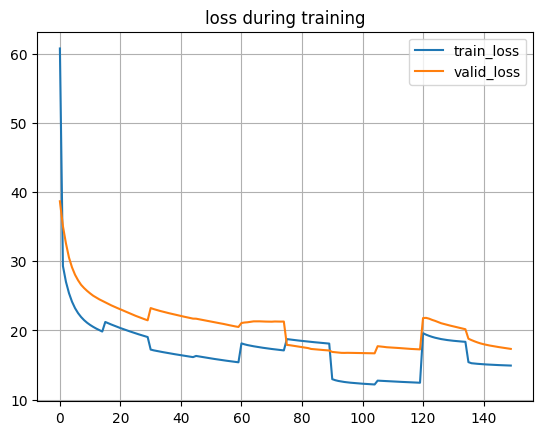

In [8]:
### Train on some subset ###
import os
file = [""] * 14
# index = ['S1','S5','S6','S7','S8','S9','S11']
index = ['S1','S6','S7','S8','S9']
for i in index:
    path = './data/data223444/'+i+'/MyPoseFeatures/D3_Positions/'
    for dirpath, dirnames, filenames in os.walk(path):
        # print(f'当前目录：{dirpath}')
        for filename in filenames:
            if 'Walking' in filename:
                if 'WalkingDog' in filename:
                    continue
                print(path+filename)
                cdf_file = cdflib.CDF(path+filename)
                poses_3d = cdf_file[0].squeeze()
                # print(len(poses_3d),len(poses_3d[0]))

                pose_3d_pro1 = np.ones((len(poses_3d),28,3),dtype=float)

                # 96->32*3, 32->28
                for i in range(len(poses_3d)):
                    cnt = 0
                    for j in range(32):     
                        pose_3d_pro1[i,cnt,:] = poses_3d[i][j*3:j*3+3]
                        if j==19 or j==22 or j==27 or j==30:
                            j = j + 1
                        else:
                            cnt = cnt + 1

                train_pose = pose_3d_pro1[0:-1,:,:]
                print("--------------------------------")

                for i in range(train_times):
                    for step in range(len(train_pose)-62):
                        y = list(train_pose[step:step+50,:,:].squeeze())
                        a = paddle.to_tensor(y,'float32')
                        a_tp = paddle.transpose(a, perm=[1, 2, 0])
                        out = net(a_tp) # 前向传播输入Forward propagate the input
                        out = paddle.transpose(out, perm=[2, 0, 1])
                        loss = criterion(out, paddle.to_tensor(train_pose[step+50:step+60,:,:].squeeze(),'float32'))# 估计损失Compute the loss
                        net.clear_gradients()# 清除渐变Clear the gradients
                        loss.backward(retain_graph=False)# 反向传播损耗Backward propagate the l
                        optimizer.step() # 更新权值 /更新权重Update the weights
                        optimizer.clear_grad() # 清除梯度
                        loss_temp = loss_temp + loss.item()
                        
                        # print(step, loss)
                    train_loss.append((loss_temp/len(train_pose)))

                    print(i, loss_temp/(len(train_pose)))
                    epoch.append(epoch_a)
                    epoch_a = epoch_a + 1
                    loss_temp = 0.0

                    for step in range(len(val_pose)-62):
                        with paddle.no_grad():
                            y = list(val_pose[step:step+50,:,:].squeeze())
                            a = paddle.to_tensor(y,'float32')
                            a_tp = paddle.transpose(a, perm=[1, 2, 0])
                            out = net(a_tp) # 前向传播输入Forward propagate the input
                            out = paddle.transpose(out, perm=[2, 0, 1])
                        val_loss1 = criterion(out, paddle.to_tensor(val_pose[step+50:step+60,:,:].squeeze(),'float32'))  # 估计损失Compute the loss
                        val_loss_ = val_loss_ + val_loss1.item()
                    val_loss.append(val_loss_ / len(val_pose))
                    print('val_loss',i, val_loss_ / len(val_pose))
                    val_loss_ = 0.0


timestr = time.strftime("%Y%m%d-%H%M%S")
plt.figure()
plt.title('loss during training')  #标题
plt.plot(epoch, train_loss, label="train_loss")
plt.plot(epoch, val_loss, label="valid_loss")
plt.legend()
plt.grid()
plt.savefig('./figs/loss'+timestr+'.png')
plt.show()

paddle.save(net.state_dict(), '/home/aistudio/weights/weights'+timestr)# 保存权重dict(), PATH)# 保存权重dict(), PATH)# 保存权重dict(), PATH)# 保存权重dict(), PATH)

In [ ]:
### Show the groudtruth ###
fig = plt.figure(figsize=plt.figaspect(0.2))
for j in range(8):
    ax = fig.add_subplot(1, 8, j+1, projection='3d')
    Plot3D(test_pose[j*15+1,:,:], ax)
plt.show()

In [ ]:
### Test on one subset ###
load_weight = paddle.load("/home/aistudio/weights/weights20230621-100542")
net.set_state_dict(load_weight)
# fig = plt.figure(figsize=plt.figaspect(0.2))
loss_all = 0.0
# n = 15
n = 30
import random
for i in range(n):
    random_int = random.randint(1, 20)
    random_int = 0
    for j in range(8):
        ax = fig.add_subplot(1, 8, j+1, projection='3d')
        out = net(paddle.to_tensor(test_pose[random_int+j*(i+1),:,:],'float32'))
        out_num = out.numpy()
        # Plot3D(out_num, ax)
        loss = criterion(out, paddle.to_tensor(test_pose[random_int+j*(i+1)+1,:,:].squeeze(),'float32'))# 估计损失Compute the loss
        # print('j = ',j,', loss = ',loss.item())
        loss_all = loss_all + loss.item()
    # print('loss all = ',loss_all/8)
    print(loss_all/8)
    loss_all = 0.0
# plt.show()

In [9]:
### Test on S5 subset ###
import os
import random
file = [""] * 14
index = ['S5']
load_weight = paddle.load("/home/aistudio/weights/weights20230629-232220")
net.set_state_dict(load_weight)
mse_criterion = paddle.nn.loss.MSELoss(reduction='mean')

for i in index:
    path = './data/data223444/'+i+'/MyPoseFeatures/D3_Positions/'
    for dirpath, dirnames, filenames in os.walk(path):
        # print(f'当前目录：{dirpath}')
        for filename in filenames:
            if 'Walking' in filename:
                if 'WalkingDog' in filename:
                    continue
                print(path+filename)
                cdf_file = cdflib.CDF(path+filename)
                poses_3d = cdf_file[0].squeeze()
                print(len(poses_3d),len(poses_3d[0]))

                pose_3d_pro1 = np.ones((len(poses_3d),28,3),dtype=float)

                # 96->32*3, 32->28
                for i in range(len(poses_3d)):
                    cnt = 0
                    for j in range(32):     
                        # print(j, cnt)
                        pose_3d_pro1[i,cnt,:] = poses_3d[i][j*3:j*3+3]
                        if j==19 or j==22 or j==27 or j==30:
                            j = j + 1
                        else:
                            cnt = cnt + 1

                # interval2 = int(len(poses_3d)*0.9)
                # interval2 = int(len(poses_3d) - 800)
                interval2 = 0
                test_pose = pose_3d_pro1[interval2:-1,:,:]
                print(test_pose.shape)

                loss_all = 0.0
                loss_all1 = 0.0
                loss_all2 = 0.0
                loss_all3 = 0.0
                loss_all4 = 0.0
                n = 60
                interval = 1
                for step in range(len(test_pose)-n-3):
                        with paddle.no_grad():
                            # a = paddle.to_tensor(list(test_pose[step:step+n+1,:,:].squeeze()),'float32')
                            y = list(test_pose[step:step+50,:,:].squeeze())
                            a = paddle.to_tensor(y,'float32')
                            # a = a.unsqueeze(axis=0)
                            a_tp = paddle.transpose(a, perm=[1, 2, 0])
                            # a = paddle.matmul(dct_m, a)
                            out = net(a_tp) # 前向传播输入Forward propagate the input
                            out = paddle.transpose(out, perm=[2, 0, 1])

                            loss1 = paddle.sqrt(mse_criterion(out[1], paddle.to_tensor(test_pose[step+51,:,:].squeeze(),'float32')))
                            loss2 = paddle.sqrt(mse_criterion(out[3], paddle.to_tensor(test_pose[step+53,:,:].squeeze(),'float32')))
                            loss3 = paddle.sqrt(mse_criterion(out[7], paddle.to_tensor(test_pose[step+57,:,:].squeeze(),'float32')))
                            loss4 = paddle.sqrt(mse_criterion(out[9], paddle.to_tensor(test_pose[step+59,:,:].squeeze(),'float32')))
                            # print(i,loss1,loss2,loss3,loss4)
                            # out = net(paddle.to_tensor(val_pose[step,:,:].squeeze(),'float32'))  # 前向传播输入Forward propagate the input
                        # val_loss1 = criterion(out, paddle.to_tensor(test_pose[step+3,:,:].squeeze(),'float32'))  # 估计损失Compute the loss
                        loss = paddle.sqrt(mse_criterion(out, paddle.to_tensor(test_pose[step+50:step+60,:,:].squeeze(),'float32')))# 估计损失Compute the loss
                        loss_all = loss_all + loss
                        loss_all1 = loss_all1 + loss1
                        loss_all2 = loss_all2 + loss2
                        loss_all3 = loss_all3 + loss3
                        loss_all4 = loss_all4 + loss4
                print('loss',i, loss_all / (len(test_pose)-n-3))
                print('loss',i,loss_all1 / (len(test_pose)-n-3),loss_all2 / (len(test_pose)-n-3),loss_all3 / (len(test_pose)-n-3),loss_all4 / (len(test_pose)-n-3))
                print("--------------------------------")

./data/data223444/S5/MyPoseFeatures/D3_Positions/Walking 1.cdf
3000 96
(2999, 28, 3)
loss 2999 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [27.54013443])
loss 2999 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [5.17693615]) Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [12.55467033]) Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [36.07122803]) Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [50.22880936])
--------------------------------
./data/data223444/S5/MyPoseFeatures/D3_Positions/Walking.cdf
2521 96
(2520, 28, 3)
loss 2520 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [28.11514473])
loss 2520 Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [5.43397760]) Tensor(shape=[1], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [12.90669441]) T

# 混合专家网络方法 Mixture of experts， MoE

In [ ]:
### 开始训练
#训练
import os
os.environ['FLAGS_eager_delete_tensor_gb']="0.0"
os.environ['FLAGS_fast_eager_delete_mode']="1"
os.environ['FLAGS_fraction_of_gpu_memory_to_use']="0"
os.environ['FLAGS_allocator_stragtegy']="auto_growth"
os.environ['FLAGS_fraction_of_cpu_memory_to_use']="0.1"
os.environ['FLAGS_memory_fraction_of_cpu_eager_deletion']="1"

import time
timestr = time.strftime("%Y%m%d-%H%M%S")

paddle.device.set_device('gpu:1')#设置gpu

net1 = PosePredictionNetwork()
net2 = PosePredictionNetwork1()
net3 = PosePredictionNetwork2()

criterion = paddle.nn.SmoothL1Loss(reduction='mean', delta=1.0)

lr = 5*10**(-4) # 学习率 5*10**(-3)  5*10**(-4)

optimizer1 = paddle.optimizer.Adamax(learning_rate=lr,
        parameters=net1.parameters())

optimizer1.clear_grad()

optimizer2 = paddle.optimizer.Adamax(learning_rate=lr,
        parameters=net2.parameters())

optimizer2.clear_grad()

optimizer3 = paddle.optimizer.Adamax(learning_rate=lr,
        parameters=net3.parameters())

optimizer3.clear_grad()

# scaler = paddle.amp.GradScaler(init_loss_scaling=1024)

train_loss = []
epoch = []
epoch_a = 0

train_times_i = 1   #迭代次数
train_times_j = 10
loss_temp = 0.0
val_loss = []
val_loss_ = 0
interval = 1

In [ ]:
### Train on some subset ###
import os
import gc
import random
from visualdl import LogWriter

def process_tensor_with_net1(y):
    a = paddle.to_tensor(y, dtype='float32')  
    a_tp = paddle.transpose(a, perm=[0, 1])
    a_tp_s = a_tp.unsqueeze(axis=0)
    out = net1(a_tp_s)
    out_s = out.squeeze(axis=0) 
    return out_s

def process_tensor_with_net2(y):
    a = paddle.to_tensor(y, dtype='float32')  
    a_tp = paddle.transpose(a, perm=[0, 1])
    a_tp_s = a_tp.unsqueeze(axis=0)
    out = net2(a_tp_s)
    out_s = out.squeeze(axis=0) 
    return out_s

def process_tensor_with_net3(y):
    a = paddle.to_tensor(y, dtype='float32')  
    a_tp = paddle.transpose(a, perm=[0, 1])
    a_tp_s = a_tp.unsqueeze(axis=0)
    out = net3(a_tp_s)
    out_s = out.squeeze(axis=0) 
    return out_s

file = [""] * 14
index = ['S1','S6','S7','S8','S9']
for i in index:
    path = './dataset/H36m/'+i+'/D3_Positions/'
    for dirpath, dirnames, filenames in os.walk(path):
        print(f'current dir：{dirpath}')
        for filename in filenames:
                train_pose = process_poses(path+filename)
                print("--------------------------------")
                
                for j in range(train_times_j):
                    loss1 = 0
                    loss2 = 0
                    loss3 = 0
                    loss_temp = 0
                    loss_temp1 = 0
                    loss_temp2 = 0
                    loss_temp3 = 0
                    step = 0
#                     for step in range(len(train_pose)-62):
                    while step < (len(train_pose)-92):
                        input1 = train_pose[step]
                        input2 = train_pose[step+1]
                        input3 = train_pose[step+2]
                        c1 = spatial_similarity(input1, input2)
                        c2 = spatial_similarity(input2, input3)
                        delta = abs(c1-c2)
                        if delta < 0.1:
                            y = list(flatten_last_two_dims(train_pose[step:step+10,:,:]).squeeze())
                            if 'Dir'in filename or 'Dis'in filename or  'Photo'in filename or 'Tog'in filename or 'Pur'in filename or 'Dog' in filename:
                                out_uf = process_tensor_with_net1(y)
                                out = unflatten_last_dim_tensor(out_uf)
                                loss1 = criterion(out[0:10], paddle.to_tensor(train_pose[step:step+10,:,:].squeeze(),'float32'))*1.0 # Compute the loss                      
                                net1.clear_gradients() # Clear the gradients
                                loss1.backward() # Backward propagate the loss
                                optimizer1.step() # Update the weights
                                optimizer1.clear_grad() # Clear the gradient
                                loss_temp = loss_temp + loss1.item()
                                loss_temp1 = loss_temp1 + loss1.item()
    #                             print(filename,'loss1=',loss1.item())
                            elif 'Eat'in filename or 'Pos'in filename or  'Gre'in filename or 'Wai' in filename:
                                out_uf = process_tensor_with_net2(y)
                                out = unflatten_last_dim_tensor(out_uf)
                                loss2 = criterion(out[0:10], paddle.to_tensor(train_pose[step:step+10,:,:].squeeze(),'float32'))*1.0 # Compute the loss                      
                                net2.clear_gradients() # Clear the gradients
                                loss2.backward() # Backward propagate the loss
                                optimizer2.step() # Update the weights
                                optimizer2.clear_grad() # Clear the gradient
                                loss_temp = loss_temp + loss2.item()
                                loss_temp2 = loss_temp2 + loss2.item()
    #                             print(filename,'loss2=',loss2.item())
                            elif 'Phon'in filename or 'Walking'in filename or  'Sit'in filename or 'Down' in filename or 'Smok' in filename:
                                out_uf = process_tensor_with_net3(y)
                                out = unflatten_last_dim_tensor(out_uf)
                                loss3 = criterion(out[0:10], paddle.to_tensor(train_pose[step:step+10,:,:].squeeze(),'float32'))*1.0 # Compute the loss                      
                                net3.clear_gradients() # Clear the gradients
                                loss3.backward() # Backward propagate the loss
                                optimizer3.step() # Update the weights
                                optimizer3.clear_grad() # Clear the gradient
                                loss_temp = loss_temp + loss3.item()
                                loss_temp3 = loss_temp3 + loss3.item()
                        
                        if (step+1) < (len(train_pose)-62):
                            step = step+1
                        
                    train_loss.append((loss_temp/len(train_pose)))

                    epoch.append(epoch_a)
                    epoch_a = epoch_a + 1

                    for step in range(len(val_pose)-62):
                        with paddle.no_grad():
                            y = list(flatten_last_two_dims(val_pose[step:step+10,:,:]).squeeze())
                            if 'Dir'in filename or 'Dis'in filename or  'Photo'in filename or 'Tog'in filename or 'Pur'in filename or 'Dog' in filename:
                                out_uf = process_tensor_with_net1(y)
                            elif 'Eat'in filename or 'Pos'in filename or  'Gre'in filename or 'Wai' in filename:
                                out_uf = process_tensor_with_net2(y)
                            elif 'Phon'in filename or 'Walking'in filename or  'Sit'in filename or 'Down' in filename or 'Smok' in filename:
                                out_uf = process_tensor_with_net3(y)
                            out = unflatten_last_dim_tensor(out_uf)
                        val_loss1 = criterion(out[0:10,:,:], paddle.to_tensor(val_pose[step:step+10,:,:].squeeze(),'float32'))  # 估计损失Compute the loss
                        val_loss_ = val_loss_ + val_loss1.item()
                        del y
                        del val_loss1
                        del out
                    val_loss.append(val_loss_ / len(val_pose))
                    print(filename,',',j,',',loss_temp/(len(train_pose)),',',val_loss_ / len(val_pose))
                    loss_temp = 0.0
                    val_loss_ = 0.0


plt.figure()
plt.title('loss during training')  #标题
plt.plot(epoch, train_loss, label="train_loss")
plt.plot(epoch, val_loss, label="valid_loss")
plt.legend()
plt.grid()
plt.show()

In [ ]:
### Test on S5 subset MSE V1 Reduced version 2024.02.05., 560 1000 ###
import os
import random
file = [""] * 14
index = ['S5']

mse_criterion = paddle.nn.loss.MSELoss(reduction='mean')
import paddle  
def process_tensor_with_net(y):
    a = paddle.to_tensor(y, dtype='float32')  
    a_tp = paddle.transpose(a, perm=[0, 1])
    a_tp_s = a_tp.unsqueeze(axis=0)
    out = net(a_tp_s)
    out_s = out.squeeze(axis=0) 
    return out_s

for i in index:
    path = './dataset/H36m/'+i+'/D3_Positions/'
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
#             if 'Dog' in filename:
#             if 'Eating' in filename or 'Greeting' in filename or 'Posing' in filename or 'WalkDog' in filename or 'WalkTogether' in filename:
#                 if 'WalkingDog' in filename:
#                     continue
                test_pose = process_poses(path+filename)

                losses = [0.0, 0.0, 0.0, 0.0, 0.0]
                loss = paddle.to_tensor([0.0, 0.0, 0.0, 0.0, 0.0], dtype='float32')
                loss_a = np.zeros(10,dtype=float)
                loss_all_a = np.zeros(10,dtype=float)
                b = np.zeros((10,28,3),dtype=float)
                n = 100
                interval = 1
                test_pose_len = len(test_pose)-n-3
                for step in range(test_pose_len):
                        with paddle.no_grad():
                            y = list(flatten_last_two_dims(test_pose[step:step+10,:,:]).squeeze())
                            if 'Dir'in filename or 'Dis'in filename or  'Photo'in filename or 'Tog'in filename or 'Pur'in filename or 'Dog' in filename:
                                out_uf = process_tensor_with_net1(y)
                            elif 'Eat'in filename or 'Pos'in filename or  'Gre'in filename or 'Wai' in filename:
                                out_uf = process_tensor_with_net2(y)
                            elif 'Phon'in filename or 'Walking'in filename or  'Sit'in filename or 'Down' in filename or 'Smok' in filename:
                                out_uf = process_tensor_with_net3(y)
                            out = unflatten_last_dim_tensor(out_uf)

                            for i in range(10):
                                loss_a[i] = paddle.sqrt(mse_criterion(out[i], paddle.to_tensor(test_pose[step+i,:,:].squeeze(),'float32')))
                            
                            b = out.numpy()
                            if 'Dir'in filename or 'Dis'in filename or  'Photo'in filename or 'Tog'in filename or 'Pur'in filename or 'Dog' in filename:
                                out_uf = process_tensor_with_net1(flatten_last_two_dims(b))
                            elif 'Eat'in filename or 'Pos'in filename or  'Gre'in filename or 'Wai' in filename:
                                out_uf = process_tensor_with_net2(flatten_last_two_dims(b))
                            elif 'Phon'in filename or 'Walking'in filename or  'Sit'in filename or 'Down' in filename or 'Smok' in filename:
                                out_uf = process_tensor_with_net3(flatten_last_two_dims(b))
                            out = unflatten_last_dim_tensor(out_uf)
                            loss[1] = paddle.sqrt(mse_criterion(out[1], paddle.to_tensor(test_pose[step+11,:,:].squeeze(),'float32')))
                            loss[2] = paddle.sqrt(mse_criterion(out[3], paddle.to_tensor(test_pose[step+13,:,:].squeeze(),'float32')))
                            
                            b = out.numpy()
                            if 'Dir'in filename or 'Dis'in filename or  'Photo'in filename or 'Tog'in filename or 'Pur'in filename or 'Dog' in filename:
                                out_uf = process_tensor_with_net1(flatten_last_two_dims(b))
                            elif 'Eat'in filename or 'Pos'in filename or  'Gre'in filename or 'Wai' in filename:
                                out_uf = process_tensor_with_net2(flatten_last_two_dims(b))
                            elif 'Phon'in filename or 'Walking'in filename or  'Sit'in filename or 'Down' in filename or 'Smok' in filename:
                                out_uf = process_tensor_with_net3(flatten_last_two_dims(b))
                            out = unflatten_last_dim_tensor(out_uf)
                            loss[3] = paddle.sqrt(mse_criterion(out[4], paddle.to_tensor(test_pose[step+24,:,:].squeeze(),'float32')))
                            loss[4] = paddle.sqrt(mse_criterion(out[9], paddle.to_tensor(test_pose[step+29,:,:].squeeze(),'float32')))

                        loss[0] = paddle.sqrt(mse_criterion(out, paddle.to_tensor(test_pose[step:step+10,:,:].squeeze(),'float32')))
                        for i in range(len(losses)):
                            losses[i] = losses[i] + loss[i].item()
                        for i in range(10):
                            loss_all_a[i] = loss_all_a[i] + loss_a[i].item()
                print(filename,',',loss_all_a[1]/test_pose_len,',',loss_all_a[3]/test_pose_len,',',loss_all_a[7]/test_pose_len,',',loss_all_a[9]/test_pose_len,',',losses[2]/test_pose_len,',',losses[3]/test_pose_len)
#                 print(filename,',',loss_all_a[1]/test_pose_len,',',loss_all_a[3]/test_pose_len,',',loss_all_a[7]/test_pose_len,',',loss_all_a[9]/test_pose_len,',',losses[1]/test_pose_len,',',losses[2]/test_pose_len,',',losses[3]/test_pose_len,',',losses[4]/test_pose_len)